<a href="https://colab.research.google.com/github/hfsuluova/CE888/blob/main/Lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading the Libraries
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
#Convert Labels into numbers
df[["y"]] = df[["y"]].apply(LabelEncoder().fit_transform)

In [ ]:
#Creating dummies to convert the categorical columns to numerical columns
df_dummies = pd.get_dummies(df)
print(df_dummies)

       age  duration  ...  poutcome_nonexistent  poutcome_success
0       56       261  ...                     1                 0
1       57       149  ...                     1                 0
2       37       226  ...                     1                 0
3       40       151  ...                     1                 0
4       56       307  ...                     1                 0
...    ...       ...  ...                   ...               ...
41183   73       334  ...                     1                 0
41184   46       383  ...                     1                 0
41185   56       189  ...                     1                 0
41186   44       442  ...                     1                 0
41187   74       239  ...                     0                 0

[41188 rows x 64 columns]


In [ ]:
#Dropping the duration column
df_dummies.drop(['duration'],axis = 1, inplace = True)

In [ ]:
df_dummies.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'mo

In [ ]:
#Checking for Null values
df_dummies.isnull().sum()
#No Null values

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 63, dtype: int64

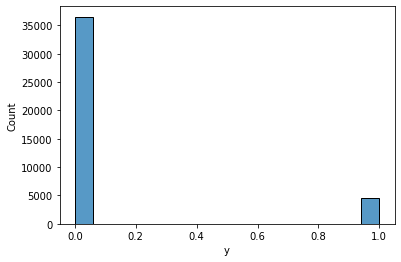

In [ ]:
#Histogram plot of the label
sns_plot = sns.histplot(df_dummies['y'])

In [ ]:
#we have an imbalance dataset
values=df_dummies['y'].value_counts()
values

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
values[0]
values[1]
imblc = values[1]/values[0]
imblc

0.126956331399803

In [ ]:
# Split Target/Output from Features
y = df_dummies.y # Target variable
X = df_dummies.drop('y',axis=1) # Features

In [ ]:
#Splitting the data using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20,random_state=50)

In [ ]:
from sklearn.metrics import f1_score
# Fitting Random Forest Classifier

# Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=100,max_depth=3)

# Train the model using the training sets
RF_Classifier.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.28719723183391005


In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [ ]:
from sklearn.metrics import f1_score
# Cross validation scores and prediction
score=cross_val_score(RF_Classifier, X_train, y_train)
print('cross_val_score=',score)
predictions = cross_val_predict(RF_Classifier, X_train, y_train, cv=10)
f1_score_clf = f1_score(y_train,predictions)
print('Cross-Predicted f1_score:', f1_score_clf)

cross_val_score= [0.89757208 0.89711684 0.89635812 0.89817906 0.89772382]
Cross-Predicted f1_score: 0.2486559139784946


In [ ]:
# Cross validation average scores
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10,scoring="f1")
print('cross_val_mean:', score.mean())

cross_val_mean: 0.24903387666573776


In [ ]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)
print("Dummy f1_score: " , f1_score(y_test, dummy_clf.predict(X_test)))

Dummy f1_score:  0.12399786210582577


In [ ]:
from sklearn.model_selection import GridSearchCV
# Using the GridSearchCV, hyperparameters are tuned
# Arranging Parameter Range 
param_grid = { 
    'n_estimators': [50,100,200,250,300,400], 
    'max_features': ['auto'],
    'max_depth' : [5,10,20,30],
    'criterion' :['gini', 'entropy']
}
grid = GridSearchCV(estimator=RF_Classifier, param_grid=param_grid, cv= 5)
# Model Fitting
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [53]:
# Best parameter after tuning 
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 250}


In [54]:
# Fitting Random Forest Classifier to the dataset after hyperparameter tuning
# Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=200,max_depth=10,max_features='auto',criterion='entropy')

# Train the model using the training sets
RF_Classifier.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred,average='weighted'))

F1 score: 0.8795187934916056


In [56]:
from sklearn.metrics import f1_score
# Checking the cross validation scores and prediction
score=cross_val_score(RF_Classifier, X_train, y_train)
print('cross_val_score=',score)
predictions = cross_val_predict(RF_Classifier, X_train, y_train, cv=10)
f1_score_clf = f1_score(y_train,predictions,average='weighted')
print('Cross-Predicted f1_score:', f1_score_clf)

cross_val_score= [0.90242792 0.89802731 0.89878604 0.90379363 0.89939302]
Cross-Predicted f1_score: 0.8776625642820565


In [57]:
#Checking the cross validation average scores
score=cross_val_score(RF_Classifier, X_train, y_train, cv=10,scoring="f1")
print('cross_val_mean:', score.mean())

cross_val_mean: 0.3310752642698122


In [58]:
#Assigning the column names to features
features=['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

[ 8  7  4  2  6 61  5  0  3 43  1 50 60 42 52 59 49 44 55 34 33 10 31 23
 54 22 48 56 57 36 38 58 14 28 41 27  9 39 30 18 25 17 21 51 16 47 32 53
 13 45 26 15 12 19 11 37 40 20 46 24 29 35]
Feature ranking:
1. nr.employed (0.162125)
2. euribor3m (0.139077)
3. emp.var.rate (0.101480)
4. pdays (0.067949)
5. cons.conf.idx (0.066642)
6. poutcome_nonexistent (0.054663)
7. cons.price.idx (0.051232)
8. age (0.040926)
9. previous (0.020221)
10. contact_cellular (0.019851)
11. campaign (0.019109)
12. month_mar (0.018455)
13. poutcome_failure (0.018113)
14. loan_yes (0.015747)
15. month_nov (0.011773)
16. day_of_week_wed (0.010830)
17. month_jun (0.010116)
18. contact_telephone (0.008100)
19. day_of_week_fri (0.007642)
20. default_no (0.007502)
21. education_unknown (0.007167)
22. job_admin. (0.006559)
23. education_professional.course (0.006086)
24. marital_married (0.005285)
25. month_sep (0.005273)
26. marital_divorced (0.005271)
27. month_jul (0.005225)
28. day_of_week_mon (0.005195)
29. day

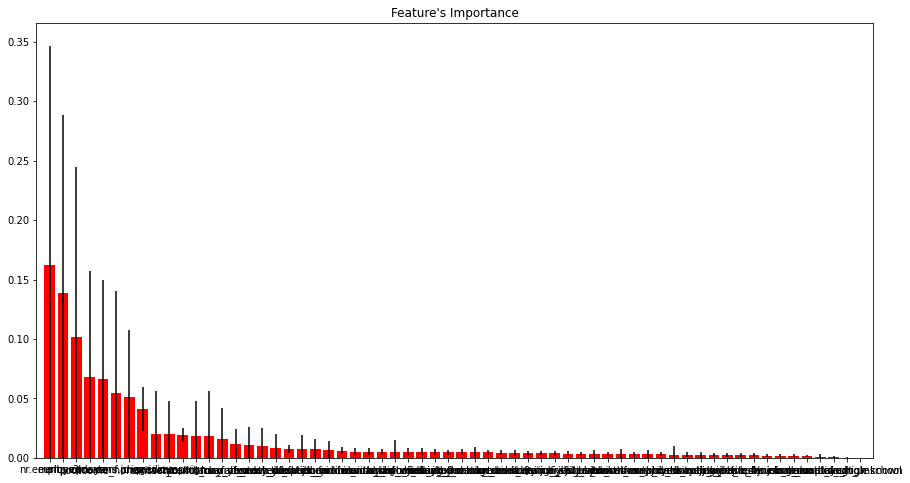

In [59]:
# Feature Importance
importances = RF_Classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_Classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Feature rankings
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the Feature Importance
fig = plt.figure()
plt.title("Feature's Importance")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

# plt.savefig("importance.pdf", bbox_inches='tight')

# We see the top 3 are:
#1. nr.employed (0.156643)
#2. euribor3m (0.156275)
#3. emp.var.rate (0.081952)

## Quiz Calculations

In [60]:
from sklearn.metrics import f1_score
# Create a Random Forest Classifier
RF1_Classifier = RandomForestClassifier(n_estimators=200,max_depth=8)

#Train the model using the training sets
RF1_Classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RF1_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.3245901639344262


In [61]:
from sklearn.metrics import f1_score
# Create a Random Forest Classifier
RF2_Classifier = RandomForestClassifier(n_estimators=150,max_depth=6)

#Train the model using the training sets
RF2_Classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RF2_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.30962343096234307


In [62]:
#For n_estimators=100,max_depth=8,random_state=60 generalisation error
from sklearn.metrics import f1_score

RF_Classifier = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=60)

#Train the model using the training sets
RF_Classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))

F1 score: 0.3360522022838499


In [63]:


#For n_estimators=100,max_depth=12,random_state=60 top 3 features
from sklearn.metrics import f1_score
# Fitting Random Forest Classifier to the dataset 
#Create a Random Forest Classifier
RF_Classifier = RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=60)

#Train the model using the training sets
RF_Classifier.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = RF_Classifier.predict(X_test)

print("F1 score:", f1_score(y_test, y_pred))



F1 score: 0.3581616481774961


[ 8  7  2 61  4  6  5  0  3  1 60 59 52 49 42 50 43 55 44 31 56 54 38 57
 36 10 23 48 22 58 14 28 33 17 34 53  9 39 18 30 41 27 21 25 32 45 16 13
 51 47 15 26 19 46 12 40 37 20 11 24 29 35]
Feature ranking:
1. nr.employed (0.146933)
2. euribor3m (0.142862)
3. pdays (0.093918)
4. poutcome_nonexistent (0.074663)
5. emp.var.rate (0.066610)
6. cons.conf.idx (0.065194)
7. cons.price.idx (0.053372)
8. age (0.044744)
9. previous (0.025034)
10. campaign (0.017224)
11. poutcome_failure (0.016363)
12. day_of_week_wed (0.015769)
13. month_nov (0.014927)
14. month_jun (0.014474)
15. loan_yes (0.013814)
16. month_mar (0.013082)
17. contact_cellular (0.012080)
18. day_of_week_fri (0.008207)
19. contact_telephone (0.007968)
20. education_professional.course (0.006273)
21. day_of_week_mon (0.005442)
22. month_sep (0.005422)
23. housing_unknown (0.005376)
24. day_of_week_thu (0.005311)
25. default_yes (0.005295)
26. job_admin. (0.005134)
27. marital_married (0.005124)
28. month_jul (0.005032)
29. marit

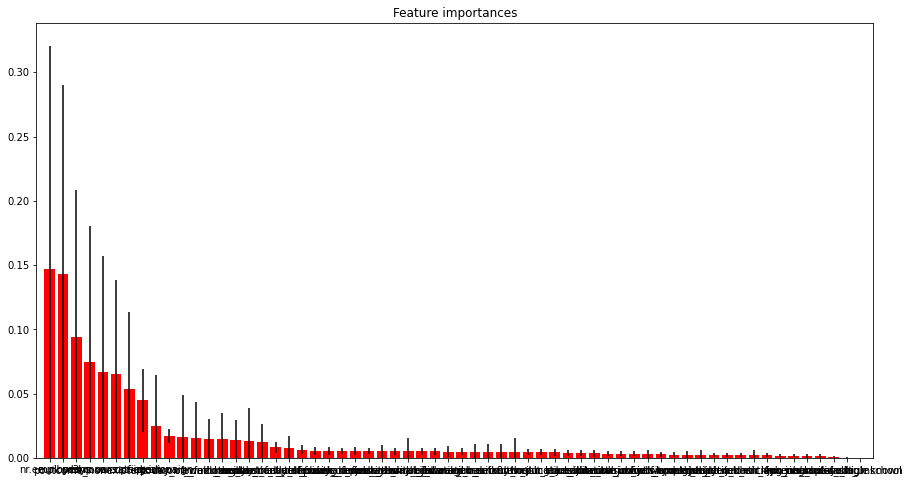

In [64]:
#Feature importance for n_estimators=100,max_depth=12,random_state=60
importances = RF_Classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_Classifier.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(15, 8)